In [290]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [291]:
df_mtt = pd.read_csv("../data/avg_taz_travel_time_sf_n_o.csv")[["sourceid","dstid","hod","mean_travel_time","standard_deviation_travel_time"]]
df_si = pd.read_csv("../output/specific-indicators.csv")[["timestamp","timestamp_request","timestamp_accepted","timestamp_on_road","ride_length","expected_ride_time","source_area_id","destination_area_id"]]
df_si.rename(columns={"source_area_id":"sourceid","destination_area_id":"dstid"}, inplace=True)

In [292]:
df_mtt.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time
0,3370,3370,23.000000,157.625000,247.637500
1,3370,3372,11.621951,272.992927,133.311951
2,3370,3375,11.545455,500.054675,155.939221
3,3370,3389,11.928571,410.892738,152.570595
4,3370,3394,11.965116,139.153721,93.618953


In [293]:
df_si.head()

,timestamp,timestamp_request,timestamp_accepted,timestamp_on_road,ride_length,expected_ride_time,sourceid,dstid
0,299.0,40.0,56.0,118.0,1705.40,109.20,3509,3485
1,336.0,40.0,45.0,57.0,1904.83,103.47,3668,3485
2,406.0,24.0,34.0,135.0,1976.56,74.33,3753,3780
3,430.0,65.0,70.0,192.0,1623.27,64.50,3753,3780
4,456.0,244.0,260.0,333.0,1879.24,111.29,3452,3463


In [294]:
df_m = pd.merge(df_mtt, df_si, how="inner", on=["sourceid","dstid"]).sort_values('timestamp')

In [295]:
df_m.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,timestamp,timestamp_request,timestamp_accepted,timestamp_on_road,ride_length,expected_ride_time
42,3509,3485,11.678161,262.845287,162.973333,299.0,40.0,56.0,118.0,1705.40,109.20
130,3668,3485,11.657534,282.723973,136.784658,336.0,40.0,45.0,57.0,1904.83,103.47
215,3753,3780,11.428571,63.595844,69.322857,406.0,24.0,34.0,135.0,1976.56,74.33
216,3753,3780,11.428571,63.595844,69.322857,430.0,65.0,70.0,192.0,1623.27,64.50
17,3452,3463,12.000000,394.775366,145.988659,456.0,244.0,260.0,333.0,1879.24,111.29


In [296]:
df_m["overhead"] = df_m.apply(lambda x: abs((x["timestamp"]-x["timestamp_request"]) - x["expected_ride_time"])/(x["expected_ride_time"])*100, axis=1)
df_m["overhead_num"] = df_m.apply(lambda x: abs((x["timestamp"]-x["timestamp_on_road"]) - x["mean_travel_time"]), axis=1)

In [297]:
o = list(df_m["overhead_num"])

In [298]:
overheads = []

for i in range(550,int(df_m['timestamp'].max())+100):
    df_filtered = df_m[(float(i-500) <= df_m["timestamp"]) & (df_m["timestamp"] <= float(i))].reset_index()
    overheads.append(df_filtered["overhead"].mean())

In [299]:
o

[81.84528735632188,
 3.723972602739707,
 207.40415584415584,
 174.40415584415584,
 271.77536585365857,
 246.40415584415584,
 173.30775,
 99.14210526315793,
 127.40430379746834,
 63.55726027397259,
 67.29841463414635,
 203.71404761904768,
 56.19987804878048,
 278.8778873239437,
 140.76301204819282,
 51.887662337662334,
 27.484868421052653,
 43.65333333333331,
 95.40415584415584,
 175.14537499999994,
 8.738589743589728,
 108.25,
 20.58512195121949,
 115.64357142857142,
 205.63760563380276,
 175.9598684210526,
 71.30164556962026,
 12.168589743589735,
 278.3436585365854,
 149.57024096385538,
 319.40415584415587,
 96.55726027397259,
 17.339166666666586,
 199.57675324675324,
 26.127999999999986,
 127.75569620253162,
 191.35602739726028,
 286.55478260869563,
 207.364880952381,
 297.0491139240507,
 118.88632911392398,
 296.6012987012988,
 308.1406944444444,
 86.45094594594593,
 144.84151898734177,
 161.33077922077928,
 78.00571428571436,
 387.51275362318836,
 23.37441860465117,
 301.8246835443

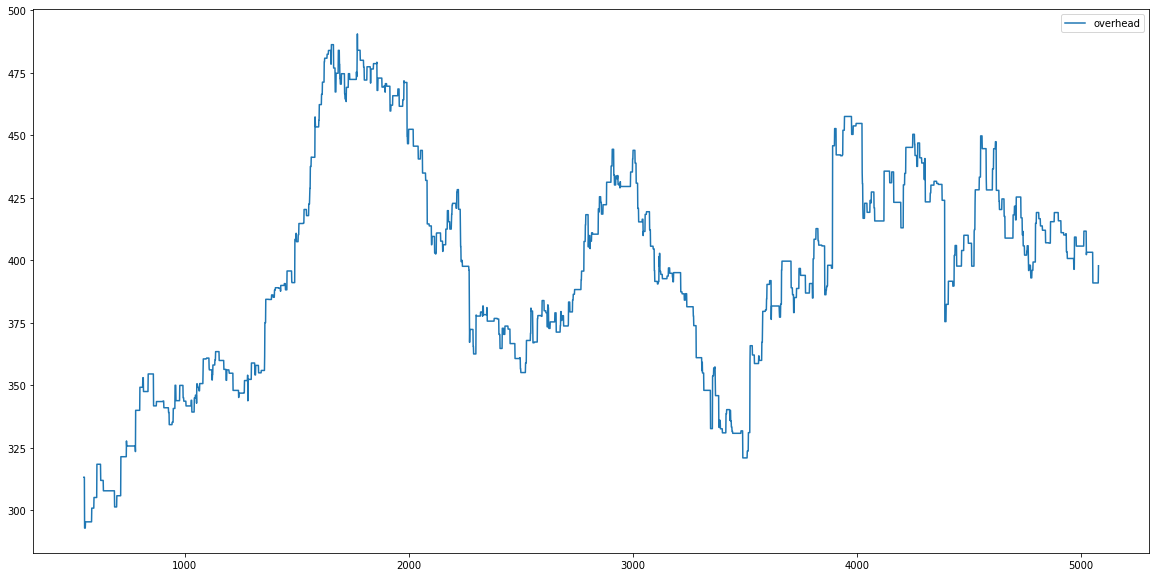

In [300]:
x=list(range(550,int(df_m['timestamp'].max())+100))
y=overheads

plt.figure(figsize=(20,10))
plt.plot(x, y, label = f"overhead")
plt.legend()
plt.savefig(f'../analysis/temp/overhead.png')
plt.show()